In [1]:
import os
import pandas as pd
from glob import glob
import numpy as np

In [2]:
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc

Using TensorFlow backend.
C:\Users\User-7\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User-7\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User-7\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User-7\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [3]:
import IPython.display as ipd
import random
from sklearn import metrics 
from keras import regularizers, optimizers




In [4]:
data = pd.read_csv('train.csv')

In [5]:
print(data)

        ID            Class
0        0            siren
1        1     street_music
2        2         drilling
3        3            siren
4        4         dog_bark
...    ...              ...
5430  8725    engine_idling
5431  8726         dog_bark
5432  8727    engine_idling
5433  8728    engine_idling
5434  8729  air_conditioner

[5435 rows x 2 columns]


In [6]:
filename= 'All_data/0.wav'

In [7]:
#def Display_ALl_Audios():
  #  for i in range(len(data1)):
ipd.display(ipd.Audio('All_data/'+str(10)+'.wav')) 

        



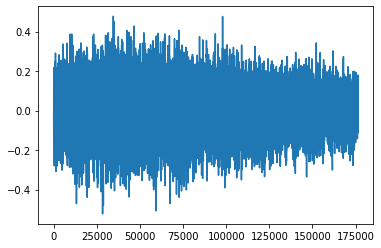

In [8]:
# to show speech wave signal 
Sound, sample_rate = librosa.load(filename, sr=None)
plt.plot(Sound)

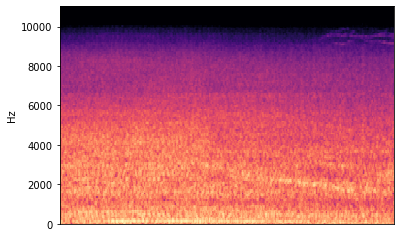

In [9]:
Sound, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
S = librosa.feature.melspectrogram(y=Sound, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
plt.show()

**Generate melspectrogram for each audiofile 

In [10]:
import matplotlib.pyplot as plt
def images(file):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath('All_data')+'/'+str(file.ID)+'.wav')
   
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = file.ID
    file  = 'Test_images/' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

**we will split our dataset as 80% training_set and 20% testing_set and then  we are going to create all images from training and test set 

In [11]:
data = pd.read_csv('train.csv' , dtype=str)

In [12]:
Training_Set = data[:4348]

In [13]:
Training_Set

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
...,...,...
4343,7003,jackhammer
4344,7004,air_conditioner
4345,7005,drilling
4346,7006,drilling


In [14]:
Test_Set =data[4348:]

In [15]:
Test_Set

,ID,Class
4348,7008,siren
4349,7009,children_playing
4350,7010,jackhammer
4351,7012,drilling
4352,7013,air_conditioner
...,...,...
5430,8725,engine_idling
5431,8726,dog_bark
5432,8727,engine_idling
5433,8728,engine_idling


In [22]:

Training_Set.apply(images , axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
4343    None
4344    None
4345    None
4346    None
4347    None
Length: 4348, dtype: object

In [23]:

Training_Set

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
...,...,...
4343,7003,jackhammer
4344,7004,air_conditioner
4345,7005,drilling
4346,7006,drilling


In [24]:


Test_Set.apply(images , axis =1 )

4348    None
4349    None
4350    None
4351    None
4352    None
        ... 
5430    None
5431    None
5432    None
5433    None
5434    None
Length: 1087, dtype: object

In [25]:
plt.close('all')

In [26]:

Training_Set

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
...,...,...
4343,7003,jackhammer
4344,7004,air_conditioner
4345,7005,drilling
4346,7006,drilling


**This function used to change the file name to image name 

In [27]:
def make_jpg(files):
    return str(files)+'.jpg'

In [28]:
Training_Set['ID'] = Training_Set['ID'].apply(make_jpg)

C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
Test_Set['ID'] = Test_Set['ID'].apply(make_jpg)

C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Now we are going to build our model by building the CNN 

In [30]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from  keras.preprocessing.image import ImageDataGenerator

# initializing the CNN 
classifier =  Sequential()

# step-1 convolution layer 
# the arguments of  convolution2D function :
# determine the number of feature detecter and accourding to that number we will get the same number of feature maps  so we will get 32 feature maps
# 3 , 3 those are row and column of matric feature detecter "filter" 
# input shape that because we have two types of image white and black that "2d array" or RGB red , green , blue "3d array as it has 3 channels " so we will use 3 and each color has two  dimentions which it will be 64
# activation function rectifier to remove negative pixels "linear" from feature map because image is non-linearity because images can have different elements 
classifier.add(Convolution2D(32,3,3,input_shape = (64,64,3), activation ='relu'))

# step2 max pooling 
#this function used to reduce tha number of parameters by decreasing the  features maps size , it take the maximum value  from each feature map slides 
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(32,3,3, activation ='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# step 3 - flattening 
# this function is used to convert the maxpooling to large vector " long column " as it will be our input layer in ANN 
classifier.add(Flatten())

# step 4 full connection 
# in this step , we will add all ANN to our CNN ,and the main purpose is to combine our features into more attributes that predict the classes even better
# we choose the number 128  for hidden layers as it between the input layer and output layer as if we calculate the input layer it will be 9*32/2 = 144 and output 10 classes 
classifier.add( Dense(output_dim = 128 , activation = 'relu'))

# output layer 
# softmax is used to map nonnormalized output as output will be 10 classes not zero or one 
classifier.add( Dense(output_dim = 10 , activation = 'softmax'))

# compile cnn 
# adam is type of stochastic gradient descent that to find aoptimal weight and adjust it faster as instead of calculate all weights one at a time we will calculate it row by row
# categorical_crossentropy loss function  used to classify observations more than two classes 
# accuracy measure the performance of model
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])








C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`


C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [31]:
#  fitting the cnn to the images
#  we rescale images to reduce image size  we put 1/255 because pixels take values between 0 and 255 so we need it to be between 0 and one 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2, # how much you want to apply these random transformation
        zoom_range=0.2,# how much you want to apply these random transformation
        horizontal_flip=True)

In [32]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:

training_set=test_datagen.flow_from_dataframe( dataframe=Training_Set,
                                     directory="Train_images",
                                     x_col="ID",
                                     y_col="Class",
                                     batch_size=32,
                                    shuffle=False,
                                    class_mode="categorical",
                                    target_size=(64,64))

Found 4348 validated image filenames belonging to 10 classes.


In [34]:

test_set=test_datagen.flow_from_dataframe(dataframe=Test_Set,
                                  directory="Test_images",
                                  x_col="ID",
                                  y_col="Class",
                                  batch_size=32,
                                  shuffle=False,
                                  class_mode="categorical",
                                  target_size=(64,64))

Found 1087 validated image filenames belonging to 10 classes.


In [35]:

history = classifier.fit_generator(generator=training_set,
                    steps_per_epoch=108,
                    validation_data=test_set,
                    validation_steps=32,
                    epochs=125)


Epoch 1/125
108/108 [==============================] - 70s 647ms/step - loss: 1.8311 - accuracy: 0.3424 - val_loss: 1.4490 - val_accuracy: 0.4717
Epoch 2/125
108/108 [==============================] - 32s 295ms/step - loss: 1.2520 - accuracy: 0.5654 - val_loss: 0.9869 - val_accuracy: 0.6168
Epoch 3/125
108/108 [==============================] - 28s 262ms/step - loss: 0.9677 - accuracy: 0.6834 - val_loss: 0.6237 - val_accuracy: 0.7038
Epoch 4/125
108/108 [==============================] - 28s 264ms/step - loss: 0.8010 - accuracy: 0.7381 - val_loss: 0.7931 - val_accuracy: 0.7331
Epoch 5/125
108/108 [==============================] - 28s 256ms/step - loss: 0.6699 - accuracy: 0.7775 - val_loss: 0.9131 - val_accuracy: 0.7234
Epoch 6/125
108/108 [==============================] - 29s 270ms/step - loss: 0.4978 - accuracy: 0.8326 - val_loss: 0.8405 - val_accuracy: 0.7693
Epoch 7/125
108/108 [==============================] - 30s 274ms/step - loss: 0.4410 - accuracy: 0.8607 - val_loss: 0.3880 

Epoch 55/125
108/108 [==============================] - 32s 300ms/step - loss: 1.4730e-04 - accuracy: 1.0000 - val_loss: 0.5080 - val_accuracy: 0.8886
Epoch 56/125
108/108 [==============================] - 32s 294ms/step - loss: 1.4304e-04 - accuracy: 1.0000 - val_loss: 0.3502 - val_accuracy: 0.8886
Epoch 57/125
108/108 [==============================] - 31s 286ms/step - loss: 1.3642e-04 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 0.8798
Epoch 58/125
108/108 [==============================] - 31s 287ms/step - loss: 1.3054e-04 - accuracy: 1.0000 - val_loss: 0.3808 - val_accuracy: 0.8876
Epoch 59/125
108/108 [==============================] - 31s 288ms/step - loss: 1.1882e-04 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.8856
Epoch 60/125
108/108 [==============================] - 35s 321ms/step - loss: 1.1253e-04 - accuracy: 1.0000 - val_loss: 0.7561 - val_accuracy: 0.8866
Epoch 61/125
108/108 [==============================] - 38s 348ms/step - loss: 1.0093e-04 - ac

108/108 [==============================] - 31s 286ms/step - loss: 4.9985e-06 - accuracy: 1.0000 - val_loss: 0.5026 - val_accuracy: 0.8866
Epoch 110/125
108/108 [==============================] - 31s 285ms/step - loss: 4.8411e-06 - accuracy: 1.0000 - val_loss: 0.4327 - val_accuracy: 0.8876
Epoch 111/125
108/108 [==============================] - 31s 283ms/step - loss: 4.2424e-06 - accuracy: 1.0000 - val_loss: 0.8414 - val_accuracy: 0.8876
Epoch 112/125
108/108 [==============================] - 37s 341ms/step - loss: 3.9864e-06 - accuracy: 1.0000 - val_loss: 0.6401 - val_accuracy: 0.8856
Epoch 113/125
108/108 [==============================] - 37s 346ms/step - loss: 4.0148e-06 - accuracy: 1.0000 - val_loss: 1.2293 - val_accuracy: 0.8866
Epoch 114/125
108/108 [==============================] - 32s 297ms/step - loss: 3.6877e-06 - accuracy: 1.0000 - val_loss: 0.8822 - val_accuracy: 0.8935
Epoch 115/125
108/108 [==============================] - 35s 322ms/step - loss: 3.3468e-06 - accuracy:

In [127]:
os.system('say -v Juan ya acabé');

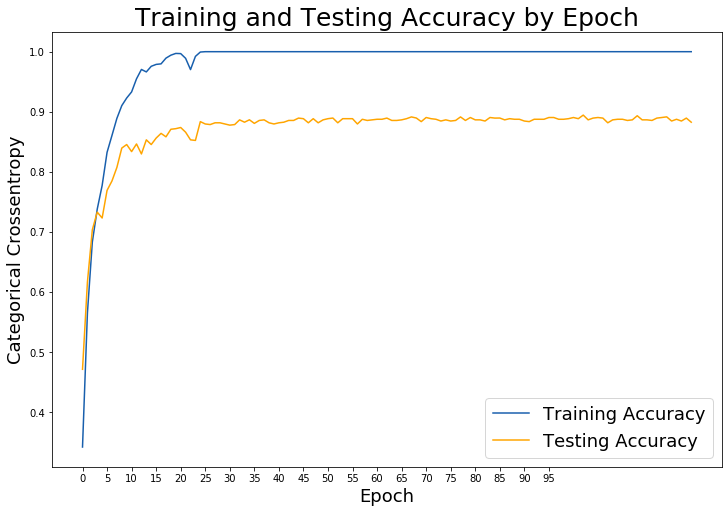

In [36]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18)


plt.show()


In [43]:
Test_set = data[4348:]

In [44]:
predict = classifier.predict_generator(test_set)

In [45]:
# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(predict)):
    p.append(np.where(predict[i] == max(predict[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(predict)):
    predictions.append(p[i][0][0])

In [46]:
Test_set['Predict classes']=predictions

C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
Test_set['Predict classes'] = Test_set['Predict classes'].map({0:'air_conditioner',1:'car_horn',2:'children_playing',3:'dog_bark', 4: 'drilling', 5:'engine_idling',6:'gun_shot',7:'jackhammer',8:'siren',9:'street_music'})

C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
# Calculating the actual test accuracy
round((1-len(Test_set[Test_set['Class']!=Test_set['Predict classes']])/len(Test_set)),2)

0.89

In [50]:
predict_cnn = pd.DataFrame(predict)
predict_cnn.to_csv('predict_cnn.csv', index=False)

In [51]:
predict_cnn

,0,1,2,3,4,5,6,7,8,9
0,0.000000e+00,3.414912e-33,2.637283e-23,1.091281e-23,0.000000e+00,4.768940e-34,0.000000e+00,0.000000e+00,1.000000e+00,1.283200e-27
1,3.156751e-16,5.849437e-16,1.000000e+00,3.296530e-16,8.323126e-22,9.499562e-11,1.207141e-23,1.001172e-22,6.148030e-11,2.854723e-08
2,3.904928e-31,7.343991e-20,1.333742e-26,3.654793e-23,2.305472e-11,1.161132e-11,1.964758e-23,1.000000e+00,8.151175e-18,2.777461e-24
3,8.418348e-08,9.089068e-07,2.390945e-21,1.840954e-11,9.999989e-01,1.353252e-26,1.089451e-10,9.715386e-08,2.791613e-19,6.254097e-13
4,9.999995e-01,4.428625e-13,3.000979e-13,8.290561e-11,8.795584e-10,2.464553e-13,2.841083e-15,9.896867e-27,4.667513e-07,9.121053e-09
...,...,...,...,...,...,...,...,...,...,...
1082,2.648087e-17,5.673309e-12,1.548080e-15,4.590213e-21,2.385624e-08,9.999999e-01,2.959245e-15,5.508365e-12,1.067980e-22,1.394730e-07
1083,0.000000e+00,0.000000e+00,3.767772e-24,1.000000e+00,0.000000e+00,0.000000e+00,7.435341e-38,0.000000e+00,0.000000e+00,0.000000e+00
1084,1.578168e-14,4.319644e-14,4.394852e-15,9.332990e-13,1.010204e-07,9.999995e-01,6.154024e-18,2.849500e-11,9.032446e-17,3.930305e-07
1085,4.579836e-08,9.450796e-12,1.679117e-08,1.349523e-11,4.072279e-12,9.999999e-01,1.591230e-16,6.782885e-10,1.152471e-12,8.332997e-09
